In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

In [2]:
cancer = pd.read_csv('/Users/vincent/dsi_lcr/LCR/01_materials/notebooks/dataset/wdbc.csv')
cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
cancer['diagnosis'] = cancer['diagnosis'].replace({
    "M": "Malignant",
    "B" :"Benign"
})

cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,Malignant,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,Malignant,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,Malignant,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,Malignant,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,Malignant,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,Malignant,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,Malignant,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,Malignant,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,Malignant,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:

standardized_cancer = cancer.copy() #Creating a copy of the original dataframe

#Exclude the ID and diagnosis columns from standardization
columns_to_exclude = ['id', 'diagnosis']

#Selecting columns to standardize 
columns_to_scale = standardized_cancer.columns.difference(columns_to_exclude) 


In [8]:
scaler = StandardScaler()
standardized_cancer[columns_to_scale] = scaler.fit_transform(standardized_cancer[columns_to_scale])
standardized_cancer


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,Malignant,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,842517,Malignant,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,84300903,Malignant,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,84348301,Malignant,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,84358402,Malignant,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,Malignant,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,926682,Malignant,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,926954,Malignant,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,927241,Malignant,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [11]:
# Set the random seed
np.random.seed(1)

# Split the data into a training and testing set. 
# Stratify to ensures that the class distribution (benign vs malignant) 
cancer_train, cancer_test = train_test_split(
    standardized_cancer, train_size=0.75, shuffle=True, stratify=standardized_cancer['diagnosis']
)

cancer_train


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
164,8712289,Malignant,2.596659,0.640025,2.476807,2.932585,-0.851870,0.192528,0.547405,1.240713,...,2.431317,0.414075,2.291686,2.676276,-0.419448,0.661808,0.588232,1.827097,1.113428,0.439125
28,852973,Malignant,0.333066,1.391668,0.429654,0.220449,0.842579,1.238650,0.998129,0.995412,...,0.828498,1.796619,1.252161,0.682803,1.390974,2.269333,1.733401,1.336800,1.822016,0.820940
378,9013594,Benign,-0.132717,-0.963324,-0.152364,-0.211286,-0.973563,-0.546958,-0.581412,-0.624450,...,-0.358085,-0.983124,-0.277044,-0.393040,-0.213419,0.357097,-0.073347,-0.140179,0.786637,0.689050
131,8670,Malignant,0.378508,0.044296,0.400820,0.267377,0.913744,0.340350,0.725686,0.824140,...,0.619345,0.052562,0.525386,0.484159,0.974533,-0.094562,0.512911,0.560244,-0.103143,-0.208132
233,88206102,Malignant,1.812780,1.982743,1.747740,1.888800,-0.339479,0.057973,0.836170,0.889399,...,1.698245,1.905725,1.651291,1.742824,-0.441366,0.138901,0.683223,0.634854,-0.750255,-0.036897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,901034302,Benign,-0.450813,-0.283820,-0.516897,-0.463558,-1.565660,-1.475202,-1.099882,-1.121268,...,-0.527893,-0.764914,-0.608859,-0.518379,-1.728826,-1.342223,-1.288651,-1.496108,-1.080282,-1.592419
301,892604,Benign,-0.473535,0.139706,-0.475295,-0.522146,-0.843330,-0.055736,-0.257368,-0.462464,...,-0.581734,-0.424570,-0.569839,-0.578851,-1.199727,-0.244691,-0.392382,-0.584035,-0.349045,-0.349442
406,905189,Benign,0.571638,-1.030809,0.507915,0.412710,-0.100363,-0.366351,-0.424349,-0.093868,...,0.298367,-0.992895,0.257314,0.118337,-0.515887,-0.522048,-0.197603,-0.025980,-0.198592,-0.766169
27,852781,Malignant,1.273153,0.223480,1.241101,1.248876,-0.139504,0.042812,0.755818,0.732313,...,1.043864,0.257745,0.972174,0.918363,0.062747,-0.270773,0.347396,0.523700,-0.905562,-0.539518


In [14]:
cancer_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426 entries, 164 to 284
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       426 non-null    int64  
 1   diagnosis                426 non-null    object 
 2   radius_mean              426 non-null    float64
 3   texture_mean             426 non-null    float64
 4   perimeter_mean           426 non-null    float64
 5   area_mean                426 non-null    float64
 6   smoothness_mean          426 non-null    float64
 7   compactness_mean         426 non-null    float64
 8   concavity_mean           426 non-null    float64
 9   concave points_mean      426 non-null    float64
 10  symmetry_mean            426 non-null    float64
 11  fractal_dimension_mean   426 non-null    float64
 12  radius_se                426 non-null    float64
 13  texture_se               426 non-null    float64
 14  perimeter_se             426 

In [ ]:
cancer_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 357 to 332
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       143 non-null    int64  
 1   diagnosis                143 non-null    object 
 2   radius_mean              143 non-null    float64
 3   texture_mean             143 non-null    float64
 4   perimeter_mean           143 non-null    float64
 5   area_mean                143 non-null    float64
 6   smoothness_mean          143 non-null    float64
 7   compactness_mean         143 non-null    float64
 8   concavity_mean           143 non-null    float64
 9   concave points_mean      143 non-null    float64
 10  symmetry_mean            143 non-null    float64
 11  fractal_dimension_mean   143 non-null    float64
 12  radius_se                143 non-null    float64
 13  texture_se               143 non-null    float64
 14  perimeter_se             143 

In [ ]:
# Use the KNN algorithm to classify the tumors in the test set.
knn = KNeighborsClassifier(n_neighbors=5)
knn


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [17]:
# Define predictor variable (X) and response variable (y)

X = cancer_train[["perimeter_mean","concavity_mean"]]
y = cancer_train['diagnosis']                                    

In [19]:
knn.fit(X, y)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [ ]:
# Step 4. Predict on the test data
# Make predictions on the test set
cancer_test['predicted'] = knn.predict(cancer_test[["perimeter_mean","concavity_mean"]])


In [23]:
# Compare the predicted values to the actual values
cancer_test[['id','diagnosis','predicted']]

,id,diagnosis,predicted
357,901028,Benign,Benign
361,901041,Benign,Benign
212,8810703,Malignant,Malignant
527,91813702,Benign,Benign
21,8510824,Benign,Benign
...,...,...,...
364,9010877,Benign,Benign
434,908469,Benign,Benign
299,892399,Benign,Benign
488,913512,Benign,Benign


In [24]:
# Calculate the accuracy of the model
knn.score(
    cancer_test[["perimeter_mean","concavity_mean"]], cancer_test['diagnosis']
)


0.9230769230769231

In [25]:
# Cross-validation to evaluate the model
pd.crosstab(
    cancer_test['diagnosis'],
    cancer_test['predicted'],
    rownames=['Actual'],
    colnames=['Predicted']
)


Predicted,Benign,Malignant
Actual,,
Benign,88,2
Malignant,9,44


In [28]:
# Caluclate precision and recall
precision_score(
    y_true = cancer_test['diagnosis'],
    y_pred = cancer_test['predicted'],
    pos_label= "Malignant"
)

0.9565217391304348

In [29]:
#Calculate recall
recall_score(
    y_true = cancer_test['diagnosis'],
    y_pred = cancer_test['predicted'],
    pos_label = "Malignant"
)


0.8301886792452831

In [113]:
# Split the data into train and valudation splits

np.random.seed(1)
cancer_subtrain, cancer_validation = train_test_split(
    cancer_train, train_size = 0.75,shuffle=True, stratify=cancer_train['diagnosis']
)

In [114]:
# Fit the model on the training data
# Step 1. Initialize the model
knn = KNeighborsClassifier(n_neighbors=4)

#Step 2. Define the model X and y
X = cancer_subtrain[["perimeter_mean","concavity_mean"]]
y = cancer_subtrain['diagnosis']

#Step 3. Fit the model to our data
knn.fit(X,y)


,n_neighbors,4
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [115]:

# Step 4. Evaluate the model on the validation set
acc = knn.score(
    cancer_validation[["perimeter_mean","concavity_mean"]],
    cancer_validation['diagnosis']
)
acc

0.875

In [116]:
# Step 5. Cross-validate the model on the validation set

knn = KNeighborsClassifier(n_neighbors=3)
X = cancer_train[["perimeter_mean","concavity_mean"]]   #Predictor variables
y = cancer_train['diagnosis']                           #Response variable      

# Cross-validate the model
returned_dictionary = cross_validate(
    estimator= knn,     #The model to evaluate
    cv = 5,             #Number of folds in the cross-validation    
    X = X,              #Predictor variables    
    y = y               #Response variable
)

cv_5_df  = pd.DataFrame(returned_dictionary)
cv_5_df



,fit_time,score_time,test_score
0,0.002325,0.007612,0.906250
1,0.002293,0.007731,0.937500
2,0.001985,0.011554,0.859375
3,0.002731,0.009120,0.843750
4,0.003233,0.009578,0.936508


In [117]:
# Display the agg mean and sem
cv_5_metrics = cv_5_df.agg(['mean','sem'])
cv_5_metrics


,fit_time,score_time,test_score
mean,0.002513,0.009119,0.896677
sem,0.000215,0.000719,0.019413


In [129]:
# Step 6. Hyperparameter tuning with GridSearchCV, start with k = 1 to 385 and step by 5
parameter_grid = {
    "n_neighbors" : range(1,255,5)      
}



In [130]:
# Use GridSearchCV to search for the best hyperparameter with 10-fold cross-validation
cancer_tune_grid = GridSearchCV(
    estimator = knn,   
    param_grid = parameter_grid,          
    cv = 5                               
)


In [131]:
# Fit the model to the training data
cancer_tune_grid.fit(
    cancer_train[["perimeter_mean","concavity_mean"]],
    cancer_train['diagnosis']
)   


,estimator,KNeighborsCla..._neighbors=31)
,param_grid,"{'n_neighbors': range(1, 255, 5)}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,31


In [132]:
accuracy_grid = pd.DataFrame(cancer_tune_grid.cv_results_)
accuracy_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002609,0.000246,0.009980,0.001516,1,{'n_neighbors': 1},0.843750,0.906250,0.843750,0.843750,0.920635,0.871627,0.034444,33
1,0.011544,0.016487,0.023447,0.026740,6,{'n_neighbors': 6},0.890625,0.937500,0.921875,0.890625,0.984127,0.924950,0.034714,10
2,0.005711,0.004610,0.014418,0.010756,11,{'n_neighbors': 11},0.890625,0.953125,0.906250,0.906250,0.968254,0.924901,0.030155,11
3,0.002304,0.000251,0.007419,0.000800,16,{'n_neighbors': 16},0.875000,0.953125,0.906250,0.875000,0.968254,0.915526,0.038896,14
4,0.002186,0.000142,0.007026,0.000476,21,{'n_neighbors': 21},0.906250,0.953125,0.906250,0.906250,0.984127,0.931200,0.032092,3
5,0.002180,0.000211,0.007034,0.000330,26,{'n_neighbors': 26},0.890625,0.937500,0.921875,0.906250,0.984127,0.928075,0.032087,5
6,0.002234,0.000103,0.007128,0.000402,31,{'n_neighbors': 31},0.906250,0.953125,0.921875,0.906250,0.984127,0.934325,0.030216,1
7,0.002200,0.000226,0.006886,0.000553,36,{'n_neighbors': 36},0.906250,0.953125,0.921875,0.921875,0.968254,0.934276,0.022816,2
8,0.002400,0.000193,0.006815,0.000586,41,{'n_neighbors': 41},0.890625,0.953125,0.921875,0.921875,0.952381,0.927976,0.023228,6
9,0.002117,0.000280,0.007015,0.000471,46,{'n_neighbors': 46},0.906250,0.953125,0.921875,0.921875,0.952381,0.931101,0.018578,4


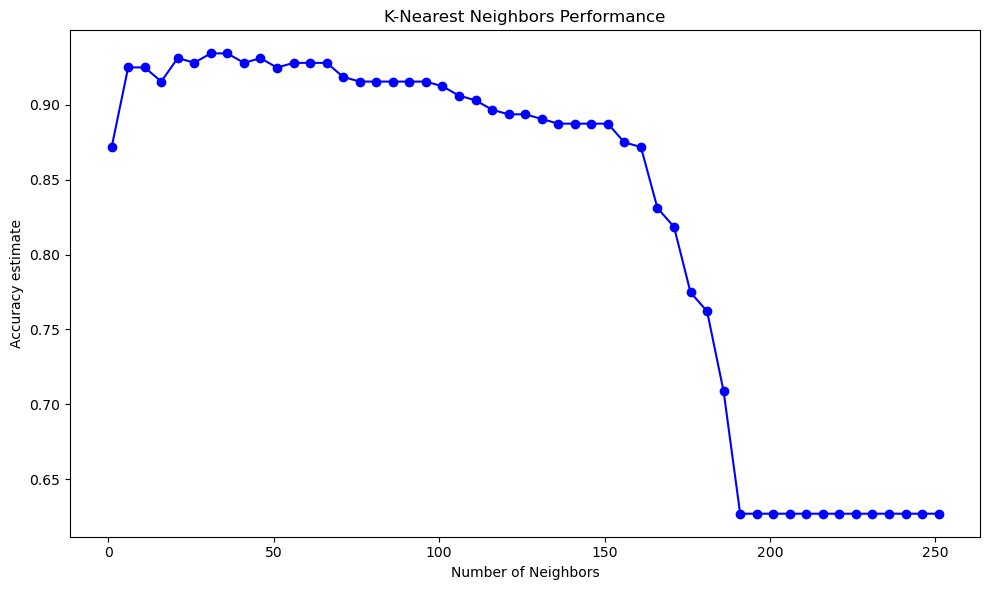

In [133]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot mean test scores with error bars
plt.plot(accuracy_grid['param_n_neighbors'], accuracy_grid['mean_test_score'], '-o', color='blue')

# Add labels and legend
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy estimate')
plt.title('K-Nearest Neighbors Performance')
plt.tight_layout()
plt.show()

In [134]:
# Get the best hyperparameter
cancer_tune_grid.best_params_

{'n_neighbors': 31}

In [135]:
knn = KNeighborsClassifier(n_neighbors= 31)
X = cancer_train[["perimeter_mean","concavity_mean"]]
y = cancer_train['diagnosis']

knn.fit(X,y)

,n_neighbors,31
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [136]:
knn.score(
    cancer_test[["perimeter_mean","concavity_mean"]],
    cancer_test['diagnosis']
)

0.9370629370629371